<a href="https://colab.research.google.com/github/yuki-tamaribuchi/ml_with_spotify_api/blob/master/spotify_api_sample01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install spotipy pydub

In [ ]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import spotipy.util as util
import json
import sys
import os
import io
import numpy as np
import IPython.display as ipd
from pydub import AudioSegment

In [ ]:
with open('/content/drive/MyDrive/api_keys/spotify_for_ml.json') as f:
  api_key=json.load(f)

In [ ]:
auth_manager=SpotifyClientCredentials(client_id=api_key['client_id'],client_secret=api_key['client_cecret'])
sp=spotipy.Spotify(auth_manager=auth_manager)

In [ ]:
result=sp.artist_top_tracks('69GGBxA162lTqCwzJG5jLp')

In [ ]:
result

{'tracks': [{'album': {'album_type': 'single',
    'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/69GGBxA162lTqCwzJG5jLp'},
      'href': 'https://api.spotify.com/v1/artists/69GGBxA162lTqCwzJG5jLp',
      'id': '69GGBxA162lTqCwzJG5jLp',
      'name': 'The Chainsmokers',
      'type': 'artist',
      'uri': 'spotify:artist:69GGBxA162lTqCwzJG5jLp'},
     {'external_urls': {'spotify': 'https://open.spotify.com/artist/26VFTg2z8YR0cCuwLzESi2'},
      'href': 'https://api.spotify.com/v1/artists/26VFTg2z8YR0cCuwLzESi2',
      'id': '26VFTg2z8YR0cCuwLzESi2',
      'name': 'Halsey',
      'type': 'artist',
      'uri': 'spotify:artist:26VFTg2z8YR0cCuwLzESi2'}],
    'external_urls': {'spotify': 'https://open.spotify.com/album/0rSLgV8p5FzfnqlEk4GzxE'},
    'href': 'https://api.spotify.com/v1/albums/0rSLgV8p5FzfnqlEk4GzxE',
    'id': '0rSLgV8p5FzfnqlEk4GzxE',
    'images': [{'height': 640,
      'url': 'https://i.scdn.co/image/ab67616d0000b273495ce6da9aeb159e94eaa453',


In [ ]:
import pandas as pd

In [ ]:
df=pd.DataFrame.from_dict(result['tracks'])

In [ ]:
df

,album,artists,disc_number,duration_ms,explicit,external_ids,external_urls,href,id,is_local,is_playable,name,popularity,preview_url,track_number,type,uri
0,"{'album_type': 'single', 'artists': [{'externa...",[{'external_urls': {'spotify': 'https://open.s...,1,244960,False,{'isrc': 'USQX91601347'},{'spotify': 'https://open.spotify.com/track/7B...,https://api.spotify.com/v1/tracks/7BKLCZ1jbUBV...,7BKLCZ1jbUBVqRi2FVlTVw,False,True,Closer,83,https://p.scdn.co/mp3-preview/8d3df1c64907cb18...,1,track,spotify:track:7BKLCZ1jbUBVqRi2FVlTVw
1,"{'album_type': 'album', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,1,247160,False,{'isrc': 'USQX91700278'},{'spotify': 'https://open.spotify.com/track/6R...,https://api.spotify.com/v1/tracks/6RUKPb4LETWm...,6RUKPb4LETWmmr3iAEQktW,False,True,Something Just Like This,81,https://p.scdn.co/mp3-preview/cb1ae1f9e2f874dd...,5,track,spotify:track:6RUKPb4LETWmmr3iAEQktW
2,"{'album_type': 'single', 'artists': [{'externa...",[{'external_urls': {'spotify': 'https://open.s...,1,208373,False,{'isrc': 'USQX91600011'},{'spotify': 'https://open.spotify.com/track/1i...,https://api.spotify.com/v1/tracks/1i1fxkWeaMmK...,1i1fxkWeaMmKEB4T7zqbzK,False,True,Don't Let Me Down,78,https://p.scdn.co/mp3-preview/4f410d4293b502e2...,1,track,spotify:track:1i1fxkWeaMmKEB4T7zqbzK
3,"{'album_type': 'album', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,1,209880,False,{'isrc': 'USQX91901353'},{'spotify': 'https://open.spotify.com/track/3g...,https://api.spotify.com/v1/tracks/3g0mEQx3NTan...,3g0mEQx3NTanacLseoP0Gw,False,True,Takeaway,77,https://p.scdn.co/mp3-preview/0017ff421bc67594...,6,track,spotify:track:3g0mEQx3NTanacLseoP0Gw
4,"{'album_type': 'album', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,1,217640,False,{'isrc': 'USQX91901124'},{'spotify': 'https://open.spotify.com/track/2o...,https://api.spotify.com/v1/tracks/2oejEp50ZzPu...,2oejEp50ZzPuQTQ6v54Evp,False,True,Call You Mine,77,https://p.scdn.co/mp3-preview/ae5f2bf4cc6dc607...,7,track,spotify:track:2oejEp50ZzPuQTQ6v54Evp
5,"{'album_type': 'album', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,1,197946,False,{'isrc': 'USQX91802210'},{'spotify': 'https://open.spotify.com/track/4N...,https://api.spotify.com/v1/tracks/4NBTZtAt1F13...,4NBTZtAt1F13VvlSKe6KTl,False,True,This Feeling,74,https://p.scdn.co/mp3-preview/c30eb8833d9d5e9b...,1,track,spotify:track:4NBTZtAt1F13VvlSKe6KTl
6,"{'album_type': 'album', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,1,226733,True,{'isrc': 'USQX91803661'},{'spotify': 'https://open.spotify.com/track/2f...,https://api.spotify.com/v1/tracks/2fVHrSxsQbJU...,2fVHrSxsQbJUuj9MW9zG1e,False,True,Who Do You Love,74,https://p.scdn.co/mp3-preview/fd81239ead953f58...,10,track,spotify:track:2fVHrSxsQbJUuj9MW9zG1e
7,"{'album_type': 'single', 'artists': [{'externa...",[{'external_urls': {'spotify': 'https://open.s...,1,226738,False,{'isrc': 'USQX91500801'},{'spotify': 'https://open.spotify.com/track/3v...,https://api.spotify.com/v1/tracks/3vv9phIu6Y1v...,3vv9phIu6Y1vX3jcqaGz5Z,False,True,Roses,72,https://p.scdn.co/mp3-preview/551ca104a8e57283...,1,track,spotify:track:3vv9phIu6Y1vX3jcqaGz5Z
8,"{'album_type': 'album', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,1,221506,False,{'isrc': 'USQX91603031'},{'spotify': 'https://open.spotify.com/track/72...,https://api.spotify.com/v1/tracks/72jbDTw1piOO...,72jbDTw1piOOj770jWNeaG,False,True,Paris,69,https://p.scdn.co/mp3-preview/1bf99008d3c4ef8f...,8,track,spotify:track:72jbDTw1piOOj770jWNeaG
9,"{'album_type': 'album', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,1,193200,False,{'isrc': 'USQX91702676'},{'spotify': 'https://open.spotify.com/track/58...,https://api.spotify.com/v1/tracks/58kZ9spgxmlE...,58kZ9spgxmlEznXGu6FPdQ,False,True,Sick Boy,70,https://p.scdn.co/mp3-preview/a2e3e0b89d2623af...,6,track,

In [ ]:
result['tracks'][0]['artists'][0]['name']

'The Chainsmokers'

In [ ]:
result['tracks'][0]['preview_url']

'https://p.scdn.co/mp3-preview/8d3df1c64907cb183bff5a127b1525b530992afb?cid=0a76113fa4624e62965d86ed06b65e0d'

In [ ]:
import librosa
import librosa.display
import pathlib
from urllib.request import urlopen

In [ ]:
url=result['tracks'][0]['preview_url']

z = io.BytesIO(urlopen(url).read())

In [ ]:
audio=z.getvalue()

In [ ]:
ipd.Audio(audio)

In [ ]:
song = AudioSegment.from_file(z, format="mp3")

In [ ]:
samples=song.get_array_of_samples()
samples=np.array(samples)

In [ ]:
samples=samples/32768

In [ ]:
samples=np.reshape(samples,newshape=(-1,2))

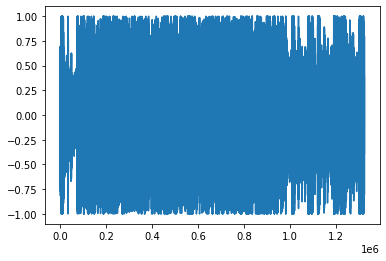

In [ ]:
import matplotlib.pyplot as plt

x=np.arange(0,len(samples))

plt.plot(x,samples[:,0])

In [42]:
cens=librosa.feature.chroma_cens(y=samples[:,0],sr=44100)

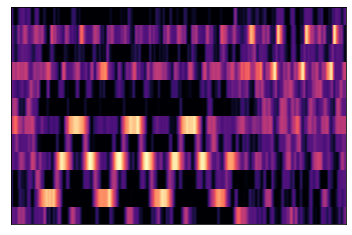

In [43]:
librosa.display.specshow(cens)